In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import seaborn as sns
import statsmodels.formula.api as smf

In [16]:
## Usar base
Base_final = pd.read_excel('/Users/beresan/Desktop/DataBase.xlsx')

In [17]:
Base_final

,Fecha,Aplicaciones,Declinados,IGAE,Casos,WUI
0,2021-06-01,0,0,96.112517,107140,18072.81
1,2021-07-01,7,3,101.581956,381685,21508.56
2,2021-08-01,42,4,104.122580,523237,21508.56
3,2021-09-01,19,6,106.617886,273635,21508.56
4,2021-10-01,21,7,107.546396,124840,19802.65
5,2021-11-01,30,15,108.115504,82488,19802.65
6,2021-12-01,31,16,108.219323,120515,19802.65
7,2022-01-01,26,7,107.912966,1349683,26455.02
8,2022-02-01,16,5,107.022507,288683,26455.02
9,2022-03-01,29,7,110.733424,48372,26455.02


In [18]:
corr= Base_final.corr()

In [19]:
corr

,Aplicaciones,Declinados,IGAE,Casos,WUI
Aplicaciones,1.000000,0.590156,0.389146,0.083735,-0.093033
Declinados,0.590156,1.000000,0.290378,-0.089884,-0.454097
IGAE,0.389146,0.290378,1.000000,-0.018847,0.635391
Casos,0.083735,-0.089884,-0.018847,1.000000,0.167311
WUI,-0.093033,-0.454097,0.635391,0.167311,1.000000


<AxesSubplot:>

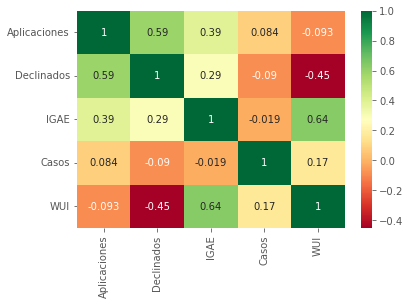

In [20]:
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap='RdYlGn')

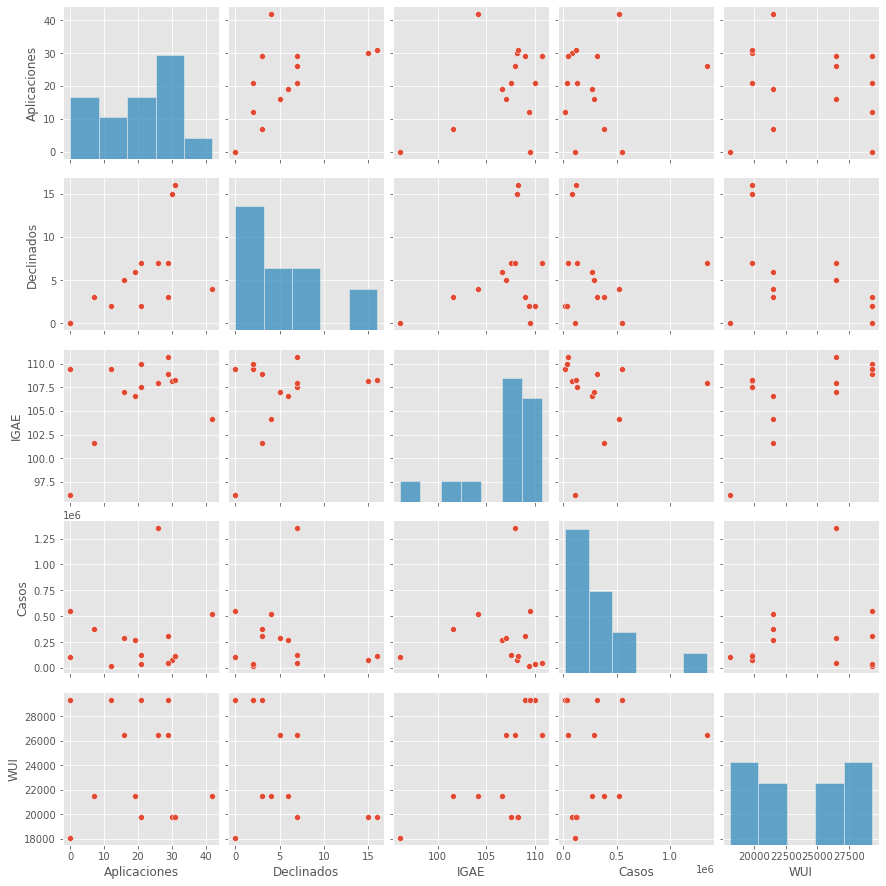

In [22]:
sns.pairplot(Base_final)

In [28]:
mod = smf.ols('Aplicaciones ~ Casos + WUI', data=Base_final).fit() 

In [29]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:           Aplicaciones   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.160
Method:                 Least Squares   F-statistic:                    0.1054
Date:                Mon, 15 Aug 2022   Prob (F-statistic):              0.901
Time:                        00:36:03   Log-Likelihood:                -54.304
No. Observations:                  14   AIC:                             114.6
Df Residuals:                      11   BIC:                             116.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7630     20.993      1.275      0.2

/Users/beresan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Comentarios regresión 0: Aplicaciones = 26.7630 + 3.592e-06*Casos -0.0003*WUI 
#R-squaured: No está cerca de 1, el modelo no se ajusta. En términos porcentuales, 0.019 significaría que nuestro modelo explica el 1.9% del cambio en nuestra variable "Aplicaciones". 
#Adj. R-squared: Una variable no es relevante para el modelo. Se debe omitir.
#Revisando las pruebas t, se rechaza la hipotesis nula de la variable WUI, lo cuál es irrelevante para la regresión por lo que se debe desechar.
#El valor p de 0.742 para los casos está diciendo que hay un 74.2% de posibilidades de que la variable casos no afecte a la variable dependiente, Aplicaciones, y que nuestros resultados se produzcan por azar. 
# Además la variable casos por el P value tan alto es una variable no significativa por lo que igual se puede desechar. 
#F-statistic y p-value: No se muestra mucha linealidad con las variables. 
# Conclusión: El modelo no es significativo.                                                                                                              

In [32]:
mod1 = smf.ols('Aplicaciones ~ Casos + IGAE', data=Base_final).fit() 

In [33]:
mod2 = smf.ols('Declinados ~ Casos + WUI', data=Base_final).fit() 

In [34]:
mod3 = smf.ols('Declinados ~ Casos + IGAE', data=Base_final).fit() 

In [36]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:           Aplicaciones   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.046
Date:                Mon, 15 Aug 2022   Prob (F-statistic):              0.384
Time:                        00:38:59   Log-Likelihood:                -53.218
No. Observations:                  14   AIC:                             112.4
Df Residuals:                      11   BIC:                             114.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -111.9422     92.943     -1.204      0.2

/Users/beresan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Comentarios regresión 1: Aplicaciones = -111.9422 + 3.203e-06*Casos +1.2280*IGAE 
#R-squaured: No está cerca de 1, el modelo no se ajusta. En términos porcentuales, 0.160 significaría que nuestro modelo explica el 16% del cambio en nuestra variable "Aplicaciones". 
#Revisando las pruebas t, se rechaza la hipotesis nula de la variable Casos, lo cuál es irrelevante para la regresión por lo que se debe desechar.
#El valor p de 0.748 para los casos está diciendo que hay un 74.8% de posibilidades de que la variable casos no afecte a la variable dependiente, Aplicaciones, y que nuestros resultados se produzcan por azar. 
# La variable IGAE tiene un P value más pequeño, por lo que resulta ser más significativa. Es decir es relevante. 
#F-statistic y p-value: Se muestra una buena cantidad de la relación lineal entre la variable dependiente y las independientes.
# Conclusión: La variable significativa solo es IGAE.       

In [37]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:             Declinados   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.430
Date:                Mon, 15 Aug 2022   Prob (F-statistic):              0.280
Time:                        00:39:07   Log-Likelihood:                -39.873
No. Observations:                  14   AIC:                             85.75
Df Residuals:                      11   BIC:                             87.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9737      7.489      2.400      0.0

/Users/beresan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Comentarios regresión 1: Declinados = 17.9737 -1.995e-07 *Casos -0.0005*WUI
#R-squaured: No está cerca de 1, el modelo no se ajusta. En términos porcentuales, 0.206 significaría que nuestro modelo explica el 20.6% del cambio en nuestra variable "Declinados". 
#Revisando las pruebas t, se rechaza la hipotesis nula de la variable Casos, lo cuál es irrelevante para la regresión por lo que se debe desechar.
#El valor p de 0.959 para los casos está diciendo que hay un 95.9% de posibilidades de que la variable casos no afecte a la variable dependiente, Decliandos, y que nuestros resultados se produzcan por azar. 
# La variable WUI tiene un P value más pequeño, por lo que resulta ser más significativa. Es decir es relevante. 
#F-statistic y p-value: Se muestra una buena cantidad de la relación lineal entre la variable dependiente y las independientes.
# Conclusión: La variable significativa solo es WUI.   

In [38]:
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:             Declinados   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.5536
Date:                Mon, 15 Aug 2022   Prob (F-statistic):              0.590
Time:                        00:39:18   Log-Likelihood:                -40.820
No. Observations:                  14   AIC:                             87.64
Df Residuals:                      11   BIC:                             89.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.5943     38.336     -0.850      0.4

/Users/beresan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Comentarios regresión 1: Declinados = -32.5943 -1.178e-06 *Casos +0.3599*IGAE
#R-squaured: No está cerca de 1, el modelo no se ajusta. En términos porcentuales, 0.091 significaría que nuestro modelo explica el 9.1% del cambio en nuestra variable "Declinados". 
#Revisando las pruebas t, se rechaza la hipotesis nula de la variable Casos, lo cuál es irrelevante para la regresión por lo que se debe desechar.
#El valor p de 0.774 para los casos está diciendo que hay un 77.4% de posibilidades de que la variable casos no afecte a la variable dependiente, Decliandos, y que nuestros resultados se produzcan por azar. 
# La variable IGAE tiene un P value más pequeño, por lo que resulta ser más significativa. Es decir es relevante. 
#F-statistic y p-value: No hay una buena relación lineal entre la variable dependiente y las independientes.
# Conclusión: La variable significativa solo es IGAE.  